In [1]:
import babypandas as bpd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# DSC 10 - Final Exam Review

<img src="data/panda.jpg" width="800">

## The Final Exam

### Monday, December 14th

- Available in a 24 hour window.
- 3 hours to complete; designed to take less.
- Cumulative, with focus on Weeks 05 -- 10.
- Open book, open note, open everything (but no talking about the exam).

## The Final Project

- Don't forget: due next week.
- Excellent practice for the final exam.

## The Final Discussion

- The stuff from the second part of the quarter was more *conceptual*.
- The final exam will therefore have more *conceptual* questions.
- Here, we'll review the main concepts from second part of the quarter.

# Concept 1: Distributions

## Distributions

- A *ditribution* tells us the probability of each possible outcome.
- Often visualized with a *histogram*.

## Example

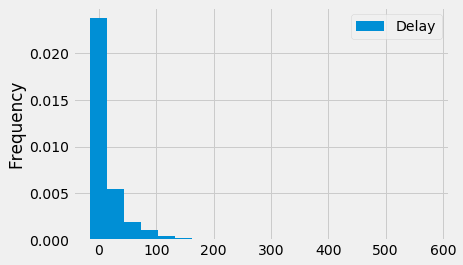

In [2]:
flights = bpd.read_csv('united_summer2015.csv')
flights.plot(kind='hist', y='Delay', bins=20, density=True)

# Concept 2: Sampling

## Populations and Samples

- The *population* is the "entire" data set. We don't usually see it.
- Instead, we see a *sample* whose size is smaller than the population.
- We usually obtain the sample *randomly*.

In [3]:
population = flights

## With/Without Replacement

- We have the option to randomly sample with/without replacement.

In [4]:
population.sample(2000, replace=True)

,Date,Flight Number,Destination,Delay
11892,8/18/15,1247,SAN,4
305,6/3/15,317,IND,25
13223,8/27/15,1669,ORD,-7
12070,8/19/15,1670,HNL,-3
12170,8/20/15,1120,BOS,32
...,...,...,...,...
12463,8/22/15,1173,EWR,-4
5820,7/10/15,249,IAD,6
6534,7/14/15,1686,DCA,36
1286,6/9/15,1440,IAD,-2


## Examples

In each of the following experiments, 1) what is the population? 2) should we sample with or without replacement?

- Picking a team of 5 from a class of 100 people.
- Rolling a 6-sided die, 20 times.
- Randomly generating names for 100 babies born.

# Concept 3: Estimation

- We want to know some aspect (parameter) of the *population*.
    - Example: the average flight delay, or total number of planes produced
- We don't have the population, only a sample.
- So we try to *estimate* the parameter using the sample.

## Statistics

- A statistic is any number computed from a sample.
- We compute a *statistic* to *estimate* a population *parameter*.
- Example: sample mean flight delay.

## The Problem

- You randomly select a sample and compute your statistic.
    - Example: the sample mean flight delay is 14 minutes.
- Your hope: it is close to the "right answer" (the pop. mean).
- You can never know *exactly* how close it is without having the population.
- The power of statistics: you can say how *likely* it is to be within a certain distance.

## Sampling Distribution

- The sample is random; so your sample statistic is, too.
- I.e., it could have been different.
- The *sampling distribution* tells us the probability of those different outcomes.
- I.e., it tells us how different sample mean *could have been*.

In [5]:
observed_mean = population.sample(2000).get('Delay').mean()
observed_mean

16.6685

## Simulating the Sampling Distribution

- Let's get more samples from the population, compute mean of each.
- **Problem**: In the real world we (usually) can't do this.

In [6]:
sample_means = np.array([])
for i in np.arange(1000):
    mean = population.get('Delay').sample(2000).mean()
    sample_means = np.append(sample_means, mean)

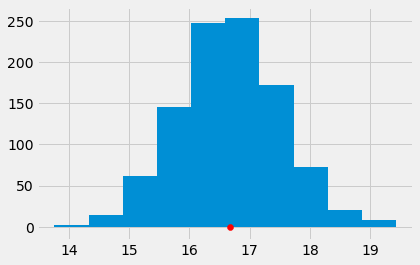

In [7]:
plt.hist(sample_means)
plt.scatter(observed_mean, 0, color='red', zorder=10)

## Sampling Distribution

- We'd love to know the sampling distribution.
- But we just have one sample.
- How do we approximate the sampling distribution with just one sample?
- Answers: the Bootstrap and the Central Limit Theorem

# Concept 4: The Bootstrap

## The Boostrap

- Problem: we want to know the sample distribution of our statistic, but we just have one sample.

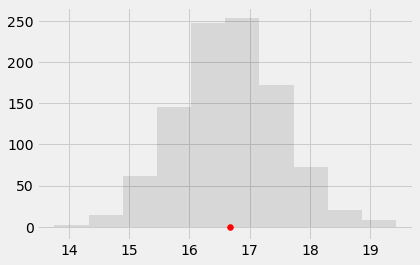

In [8]:
original_sample = population.sample(2000)
plt.hist(sample_means, alpha=.1, color='black')
plt.scatter(original_sample.get('Delay').mean(), 0, color='red', zorder=10)

## Idea

- I wish I had the population; then I could get more samples:

In [9]:
another_sample = population.sample(2000)

- I don't have the population.
- But hey, the original sample probably looks like the population. Let's sample from it.

In [10]:
bootstrap_sample = original_sample.sample(2000, replace=True)

## Boostrapping and Replacement

- **Important**: when we get a boostrap sample, we sample *with* replacement. Why?
- If we didn't we'd just get the same data set back:

In [11]:
original_sample.sample(2000, replace=True).get('Delay').mean()

16.557

## Bootstrapping and Duplicates

- If we sample with replacement, we'll get duplicates.
- This is OK! In fact, it is necessary.
- The mean doesn't care about duplicates.
    - mean of [1.9, 2.1, 6.1, 6.2] is $\approx$ mean of [2, 2, 6, 6]

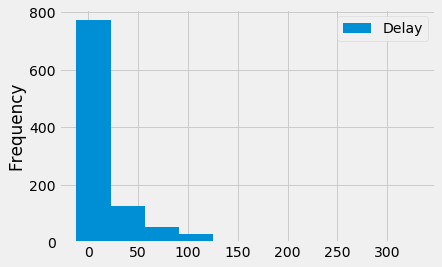

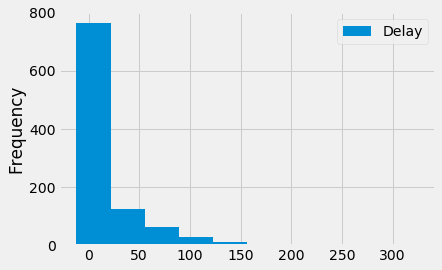

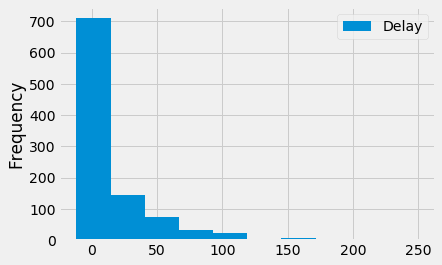

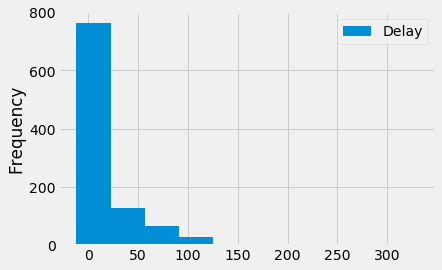

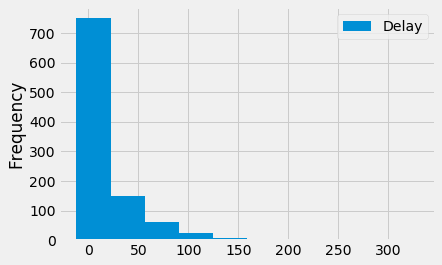

In [12]:
for i in range(5):
    original_sample.sample(1000, replace=True).plot(kind='hist', y='Delay')

## Example

In [13]:
bootstrap_sample_means = np.array([])
for i in np.arange(5000):
    bootstrap_sample_mean = original_sample.get('Delay').sample(original_sample.shape[0], replace=True).mean()
    bootstrap_sample_means = np.append(bootstrap_sample_means, bootstrap_sample_mean)

(array([0.00352889, 0.02470225, 0.10939568, 0.25760918, 0.43758271,
        0.44816939, 0.30348478, 0.12880459, 0.03705337, 0.01411557]),
 array([13.7595 , 14.32625, 14.893  , 15.45975, 16.0265 , 16.59325,
        17.16   , 17.72675, 18.2935 , 18.86025, 19.427  ]),
 <a list of 10 Patch objects>)

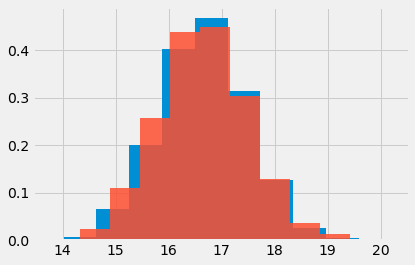

In [14]:
plt.hist(bootstrap_sample_means, density=True)
plt.hist(sample_means, density=True, alpha=.85)

# Concept 5: The Central Limit Theorem

## The CLT

- Problem: we want to know the sample distribution of our statistic, but we just have one sample.

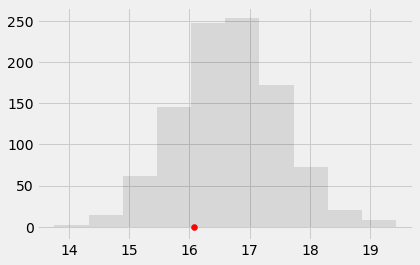

In [15]:
original_sample = population.sample(2000)
plt.hist(sample_means, alpha=.1, color='black')
plt.scatter(original_sample.get('Delay').mean(), 0, color='red', zorder=10)

## Idea

- Some smart people proved that the distribution of the *sample mean* will be (approximately) normal.
- This is the **Central Limit Theorem**:

> The sampling distribution of the sample mean is approximately a normal curve, centered at the population mean, and with standard deviation equal to the population standard deviation over the square root of the sample size.

## CLT

- The CLT let's us approximate the sample distribution of the mean without getting more samples or running the bootstrap.
- Small problem: we don't have the sample mean/SD. That's OK, just use the sample mean/SD.

## Careful!

- There are lots of distributions here. The population distribution, the sample distribution, and the distribution of the sample mean, each with their own mean / SD.

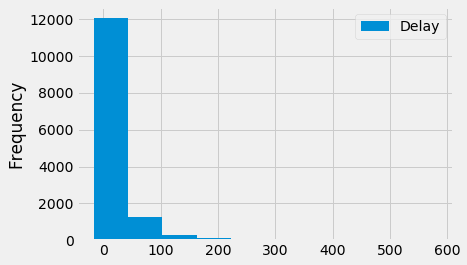

In [16]:
population.plot(kind='hist', y='Delay')

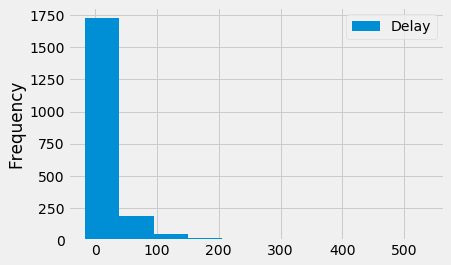

In [17]:
original_sample.plot(kind='hist', y='Delay')

(array([  2.,  14.,  62., 146., 248., 254., 172.,  73.,  21.,   8.]),
 array([13.7595 , 14.32625, 14.893  , 15.45975, 16.0265 , 16.59325,
        17.16   , 17.72675, 18.2935 , 18.86025, 19.427  ]),
 <a list of 10 Patch objects>)

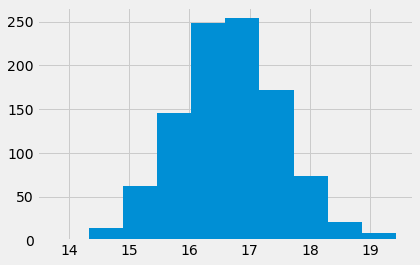

In [18]:
plt.hist(sample_means)

## Example

In [19]:
def norm(x, mu, sigma):
    return 1/np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (x - mu)**2 / sigma**2)

In [20]:
mu = original_sample.get('Delay').mean()
sigma = np.std(original_sample.get('Delay')) / np.sqrt(2000)

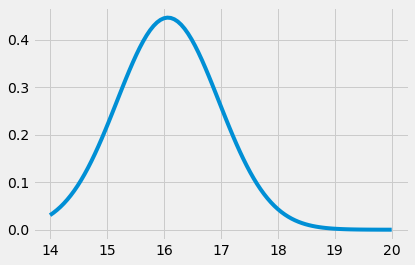

In [21]:
x_clt = np.linspace(14, 20, 100)
y_clt = norm(x_clt, mu, sigma)
plt.plot(x_clt, y_clt)

## CLT vs Boostrapping

- The CLT and Boostrapping are two ways of approximating a sampling distribution.
    - How different could our estimate have been?
- However, the CLT is **only** useful when talking about the sample mean (or sample sum).
- The boostrap is more generally useful. Example: the sample median.

## When to use the CLT vs the Boostrap

- If we're talking about the sample mean, use the CLT.
- *Could* use the boostrap, but it's less accurate/slower.
- If we're talking about another statistic (e.g., median), use the bootstrap.

# Concept 6: Confidence Intervals

## Confidence Intervals

- How different could our estimate have been?
- Instead of giving a single estimate, give an interval and a "confidence level".
- E.g., "I'm 95% sure that the population mean flight delay is between 14 and 17".

## CIs and the Sampling Distribution

- If we have a sampling distribution, we can construct a CI (no matter how we got the sampling distribution).

(array([0.00710422, 0.06490676, 0.19988698, 0.40203439, 0.46758699,
        0.31323161, 0.127876  , 0.02680229, 0.00387503, 0.00129168]),
 array([14.015  , 14.63435, 15.2537 , 15.87305, 16.4924 , 17.11175,
        17.7311 , 18.35045, 18.9698 , 19.58915, 20.2085 ]),
 <a list of 10 Patch objects>)

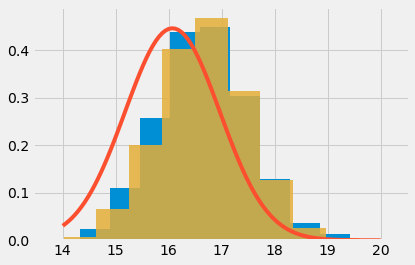

In [22]:
plt.hist(sample_means, density=True)
plt.plot(x_clt, y_clt)
plt.hist(bootstrap_sample_means, density=True, alpha=0.85)

## Constructing CIs

- An $x$% CI contains the middle $x$% of the sampling distribution.
- Two ways:
    1. If we have a bunch of sample statistics (like from the boostrap), we can use `np.percentile`.
    2. If we're using the CLT, we can use the rule of thumb: 95% of normal curve is within 2 SDs of mean.

## Example: From the Actual Sampling Distribution

In [23]:
[left_sms, right_sms] = np.percentile(sample_means, 2.5), np.percentile(sample_means, 97.5)
[left_sms, right_sms]

[15.1053625, 18.3181]

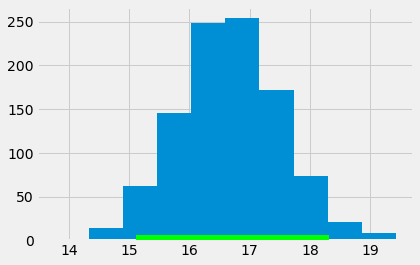

In [24]:
plt.hist(sample_means)
plt.plot([left_sms, right_sms], [0,0], color='lime', linewidth=10, zorder=10)

## Example: From the Boostrap Sampling Distribution

In [25]:
[left_boot, right_boot] = np.percentile(bootstrap_sample_means, 2.5), np.percentile(bootstrap_sample_means, 97.5)
[left_boot, right_boot]

[15.072474999999999, 18.2891]

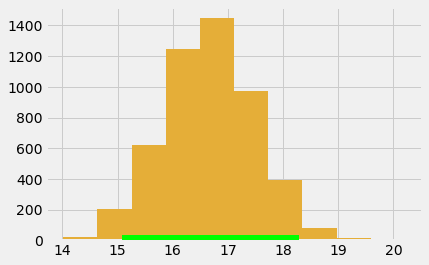

In [26]:
plt.hist(bootstrap_sample_means, color='C2')
plt.plot([left_boot, right_boot], [0,0], color='lime', linewidth=10, zorder=10)

## Example: From the CLT

In [27]:
import scipy.stats

In [28]:
[left_clt, right_clt] = [
    original_sample.get('Delay').mean() - 2 * np.std(original_sample.get('Delay')) / np.sqrt(2000),
    original_sample.get('Delay').mean() + 2 * np.std(original_sample.get('Delay')) / np.sqrt(2000),
]

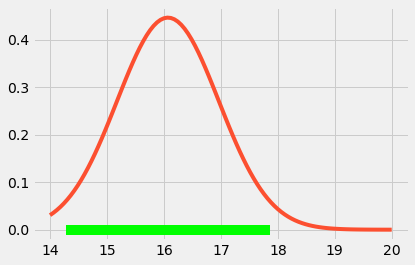

In [29]:
plt.plot(x_clt, y_clt, color='C1')
plt.plot([left_clt, right_clt], [0,0], color='lime', linewidth=10, zorder=10)

## Comparison

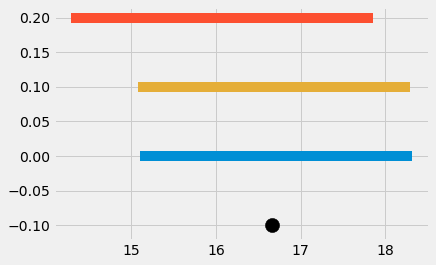

In [30]:
plt.plot([left_clt, right_clt], [.2, .2], color='C1', linewidth=10, zorder=10)
plt.plot([left_boot, right_boot], [.1,.1], color='C2', linewidth=10, zorder=10)
plt.plot([left_sms, right_sms], [0,0], color='C0', linewidth=10, zorder=10)
plt.scatter(population.get('Delay').mean(), -.1, color='black', s=200)

# Accuracy

- The Boostrap and CLT are *approximations*.
- As the sample size increases, they get better.

# Concept 7: Hypothesis Testing

## Assessing Models

- We have a *model* of reality (a set of assumptions)
    - Example: jury panels are selected at random from eligible population
- Is the model plausible or unlikely?
- We can use probability and simulation to assess its likelihood.

## Null and Alternative Hypotheses

- The *null* hypothesis is the "default", "boring" model of reality.
- The *alternative* hypothesis is the interesting one.
- The null hypothesis is (usually) precise and specific enough that it allows us to simulate.

## Example

I think a coin is unfair. To test it, I make the following hypotheses:

- Null: the coin is fair
- Alternative: the coin is not fair

## Example

I think a coin is *biased towards heads*. I make the following hypotheses:
    
- Null: the coin is fair
- Alternative: the coin is unfair and biased towards heads

## Workflow

- Is the null hypothesis false?
- Flip the coin a bunch, count *observed* numbers of heads.
- Is what we observed consistent with the null model, or very unlikely?
- We need probability of seeing observed under the null hypothesis.

## Test Statistics

- We must have a way of measuring how far we are from what is expected under the null.
- We need to choose a *test statistic*.
- The larger the test statistic, the more extreme.
- Choice depends on the *alternative* hypothesis.

## Example

- Alternative: the coin is not fair
- Possible test statistics:
    - the absolute difference between proportion of heads and 50%
    - the absolute difference between number of heads and 50
    - the TVD between sample distribution of heads/tails and the uniform distribution
    - ...

## Example

- Alternative: the coin is not fair, and *biased towards heads*.
- The statistic should be larger the more extreme the outcome.
- Possible test statistics:
    - the number of heads
    - the signed difference between the number of heads and 50
    - the signed difference between the proportion of heads and 50%

## Example

- You flip a coin 100 times and see 57 heads.
- Test alternative hypothesis: coin is biased towards heads.
- I.e., what is the probability of seeing 57 heads if coin is indeed fair?
- This is the *p-value*.

In [31]:
counts = np.array([])
for i in np.arange(1000):
    # flip fair coin 100 times
    flips = np.random.choice(['H', 'T'], 100)
    
    count = np.count_nonzero(flips == 'H')
    counts = np.append(counts, count)

In [32]:
counts

array([57., 53., 53., 54., 59., 41., 50., 52., 49., 40., 58., 51., 44.,
       50., 54., 53., 53., 52., 49., 57., 58., 47., 43., 47., 58., 48.,
       54., 51., 47., 41., 47., 53., 49., 47., 48., 58., 51., 51., 47.,
       50., 54., 57., 56., 46., 47., 50., 56., 54., 52., 46., 56., 51.,
       50., 49., 45., 47., 41., 51., 44., 43., 44., 52., 49., 47., 50.,
       44., 64., 50., 47., 54., 49., 48., 50., 48., 47., 48., 43., 42.,
       46., 47., 43., 42., 51., 54., 48., 49., 53., 55., 47., 50., 44.,
       54., 41., 51., 52., 50., 56., 53., 55., 36., 46., 54., 41., 47.,
       43., 50., 50., 52., 47., 60., 50., 51., 52., 54., 60., 55., 59.,
       52., 55., 43., 49., 41., 52., 46., 48., 49., 53., 54., 59., 44.,
       54., 45., 46., 51., 54., 58., 60., 51., 55., 54., 46., 50., 53.,
       60., 51., 47., 42., 48., 46., 55., 52., 45., 51., 53., 39., 54.,
       50., 60., 55., 52., 54., 53., 51., 49., 48., 48., 51., 53., 53.,
       52., 54., 50., 46., 54., 43., 48., 52., 52., 53., 54., 46

In [33]:
np.count_nonzero(counts >= 57) / 1000

0.103

## Rejecting and Failing to Reject

- The p-value tells us the probability of seeing the observed outcome if the null is true.
- If we had set a "confidence threshold" before the experiment, we can reject at that confidence level.
- E.g., if we had set a 5% threshold (95% confidence) we would fail to reject.
- Still, a p-value of $\approx$ 10% means that we were getting close to rejecting.

## Accepting a null hypothesis?

- We never "accept" a null hypothesis, we only "fail to reject". Why?
- If we see 50 heads and 50 tails, this isn't evidence that the coin is fair; only that it is close to fair.
- It would be wrong to say that we are "95% sure that the coin is fair".

# Concept 8: A/B Testing

## A/B Testing

- A type of hypothesis test.
- We have two groups. Do they come from the same distribution?
- Example: baby weights for mothers who smoked / didn't smoke.

## Idea

- The null hypothesis: they come from the same distribution.
- We can't directly simulate using the null.
- Permuting group labels is like sampling more data.

## Permutation Tests

- Given a table, one column with group labels, another with quantity of interest.
- Repeatedly:
    - Shuffle the group labels.
    - Compute a test statistic measuring difference between groups.
- Plot the distribution of differences, use to calculate p-value.

# Concept 9: Linear Regression

## Lets make a scatter plot:
 - Below is some randomlly generated data, normally you would use real world data

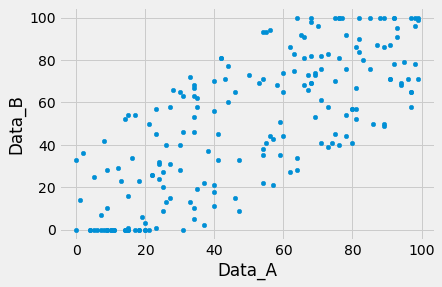

In [50]:
# lets create some random data
randomData = bpd.DataFrame(data = {
    "Data_A" : (np.random.randint(0,100,size=(200)))
}, index=np.arange(200))

# create a random set of data that is +/-20 from generated Data A  
randomCol = randomData.get('Data_A')
newCol = np.array([])

for i in range(randomCol.shape[0]):
    newCol = np.append(newCol, int(randomCol.iloc[i] + np.random.randint(-40,40)))
    #check within 0 and 100
    if newCol[i] > 100:
        newCol[i] = 100
    if newCol[i] < 0:
        newCol[i] = 0

randomData=randomData.assign(Data_B = newCol)


#plot the data
randomData.plot(kind='scatter', x='Data_A', y='Data_B')

### Converting columns to standard units
* makes different scatterplots comparable
* allows x and y axis to be "similarly scaled"
    - both axes measure standard deviations from their means
* doesn't change shape of the scatterplot (conversion is linear)

In [51]:
# a simple function to help up standardize the units
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    any_numbers = np.array(any_numbers)
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

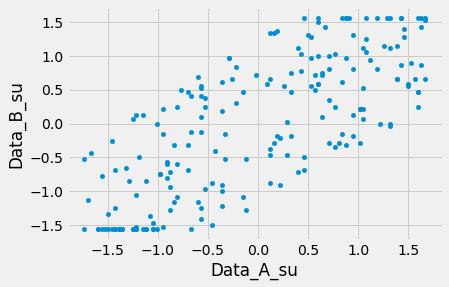

In [52]:
# Lets standardize the original (randomlly generated) Data
Data_A_su = standard_units(randomData.get('Data_A'))
Data_B_su = standard_units(randomData.get('Data_B'))

#make a new data frame
randomData_su = bpd.DataFrame()
randomData_su = randomData_su.assign(Data_A_su = Data_A_su)
randomData_su = randomData_su.assign(Data_B_su = Data_B_su)

randomData_su

#plot the data
randomData_su.plot(kind='scatter', x='Data_A_su', y='Data_B_su')

## Definition: Correlation Coefficient

**Definition**: The correlation coefficient $r$ of two attributes $x$ and $y$ is the average value of the product of $x$ and $y$ when measured in standard units.

* If `x` and `y` are arrays (i.e. columns in a table): 
```
r = np.mean(x_su * y_su)
```
where `x_su` and `y_su` are `x` and `y` converted to standard units.


* Measures how clustered points are around a straight line (linear association)
* Based on standard units
* $-1 \leq r \leq 1$
    - $r = 1$: scatterplot is a line of slope 1.
    - $r = -1$: scatterplot is a line of slope -1.
* $r = 0$: no linear association; *uncorrelated*.

In [53]:
r = (randomData_su.get('Data_A_su') * randomData_su.get('Data_B_su')).mean()
r

0.755492800054725

## Using the correlation coefficient for prediction
In standard units:
* The line through $(0,0)$ with slope $r$ is called the regression line.
* If the association between attributes is linear, the graph of averages is approximately the regression line.
* If the line is given by $f(x) = mx + b$, then the prediction for $x$ is given by $f(x)$.

## Regression line equation:

* In standard units:
$$ y = r \times x $$
* In original units, 
    - where $m_x$, $m_y$ are the averages of $x$ and $y$
    - where $s_x$, $s_y$ are the standard deviations of $x$ and $y$,
$$\frac{(y - m_y)}{s_y} = r \times \frac{(x - m_x)}{s_x}$$
* This equation reworked into the point-slope form of a line:
$$(y - m_y) = \left(\frac{r\cdot s_y}{s_x}\right)(x - m_x)$$

* Or in the slope-intercept form:

$$y = \left(\frac{r\cdot s_y}{s_x}\right)x + \left(m_y - \frac{r\cdot s_y\cdot m_x}{s_x}\right)$$

## Slope and intercept

* The regression line is given by $y = mx + b$, where:
    - the slope $m$ is: $$m = r\cdot\frac{SD\ of\ x}{SD\ of\ y}$$
    - the y-intercept $b$ is: $$b = (avg\ of\ y) - m\cdot(avg\ of\ x)$$


In [54]:
#define the correlation, slop and intercept function
def correlation(t, x, y):
    return np.mean(standard_units(t.get(x))*standard_units(t.get(y)))

def slope(t, x, y):
    """The slope of the regression line (original units)"""
    r = correlation(t, x, y)
    return r * np.std(t.get(y)) / np.std(t.get(x))

def intercept(t, x, y):
    """The intercept of the regression line (original units)"""
    return t.get(y).mean() - slope(t, x, y) * t.get(x).mean()


Slope: 0.8329543878866209  y-intercept: 7.949968183665078


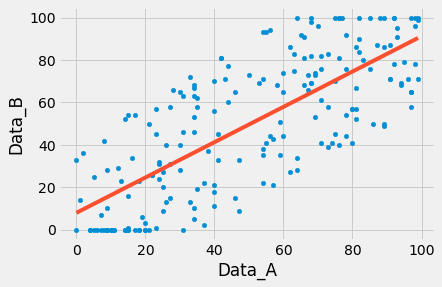

In [55]:
#use our defined functions to find slope and intercept
m = slope(randomData, 'Data_A', 'Data_B')
b = intercept(randomData, 'Data_A', 'Data_B')

print('Slope: ' + str(m) + '  y-intercept: ' + str(b))

#polt with our dataFrame:
randomData.plot(kind='scatter', x='Data_A', y='Data_B')
x = np.arange(0,100)
plt.plot(x, m * x + b, color='C1');
